In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_excel("Data - Part 1.xlsx",index_col=0)

In [3]:
df1.head()

,Month Number,Year,Industry,Country,Customer Sub-Industry,Customer ID,Product ID,Total Cost Amount $,Total Revenue Amount $
0,2.0,2020,Banking,United Kingdom,Financial: Banking Major,13167FR,6627.0,415049.0279,194768.5772
1,8.0,2020,Banking,Australia,Financial: Banking Maj,10009SG,5801.0,0.0000,-5778.3752
2,8.0,2020,Retail,United Kingdom,Retail: Food and Mass,50148141DE,5907.0,5341.6700,0.0000
3,9.0,2020,Hospitality,America,Hospitality:Eating Drinking QS,7392863,1639.0,2.8900,0.0000
4,9.0,2020,Hospitality,United States,Hospitality:Eating Drinking TS,8568866,1612.0,11188.2000,9816.0000


In [4]:
df1.shape

(2341, 9)

In [5]:
df1.isna().sum() #check null values

Month Number              6
Year                      0
Industry                  2
Country                   4
Customer Sub-Industry     1
Customer ID               9
Product ID                7
Total Cost Amount $       6
Total Revenue Amount $    6
dtype: int64

In [6]:
df1.dropna(inplace=True)# drop null values

In [7]:
df1.columns

Index(['Month Number', 'Year', 'Industry', 'Country', 'Customer Sub-Industry',
       'Customer ID', 'Product ID', 'Total Cost Amount $',
       'Total Revenue Amount $'],
      dtype='object')

In [8]:
df1['Country'].unique()

array(['United Kingdom', 'Australia', 'America', 'United States',
       'United Arab Emirates', 'China', 'UK', 'United states', 'UAE',
       'USA', 'CHINA', 'Italy', 'US', 'Australi'], dtype=object)

In [9]:
df1['Country'].replace(['United Kingdom', 'UK'], 'UK',inplace=True)
df1['Country'].replace(['America', 'United States','United states','USA','US'], 'US',inplace=True)
df1['Country'].replace(['Australia', 'Australi'], 'Australia',inplace=True)
df1['Country'].replace(['China','CHINA'], 'CHINA',inplace=True)
df1['Country'].replace(['United Arab Emirates','UAE'], 'UAE',inplace=True)

In [10]:
df1['Country'].unique()

array(['UK', 'Australia', 'US', 'UAE', 'CHINA', 'Italy'], dtype=object)

In [11]:
df1['Industry'].unique()

array(['Banking', 'Retail', 'Hospitality', 'banking', 'Rtail', 'Bank',
       'Hosp', 'RETAIL', 'Ret', 'Retai'], dtype=object)

In [12]:
df1['Industry'].replace(['Banking','banking','Bank',], 'Banking',inplace=True)
df1['Industry'].replace(['Retail','Rtail','RETAIL', 'Ret','Retai'], 'Retail',inplace=True)
df1['Industry'].replace(['Hospitality','Hosp'], 'Hospitality',inplace=True)

In [13]:
df1['Industry'].unique()

array(['Banking', 'Retail', 'Hospitality'], dtype=object)

In [14]:
df1['Customer Sub-Industry'].unique()

array(['Financial: Banking Major', 'Financial: Banking Maj',
       'Retail: Food and Mass', 'Hospitality:Eating Drinking QS',
       'Hospitality:Eating Drinking TS', 'Financial: Banking CFI',
       'Financial: Other Financial Services',
       'Retail: Dept and Specialty', 'Retail: Distribution-Wholesale',
       'Retail: Petroleum-Convenience', 'retail: Food and Mass',
       'Financial: Channel', 'Retail: Channel', 'Hosp:Eating Drinking QS',
       'Banking CFI', 'Retail: Drug'], dtype=object)

In [15]:
df1['Customer Sub-Industry'].replace(['Financial: Banking Major', 'Financial: Banking Maj'], 'Financial: Banking Major',inplace=True)
df1['Customer Sub-Industry'].replace(['Retail: Food and Mass','retail: Food and Mass'], 'Retail: Food and Mass',inplace=True)
df1['Customer Sub-Industry'].replace(['Financial: Banking CFI','Banking CFI'], 'Financial: Banking CFI',inplace=True)
df1['Customer Sub-Industry'].replace(['Hospitality:Eating Drinking QS','Hosp:Eating Drinking QS','Hospitality:Eating Drinking TS'], 'Hospitality:Eating Drinking QS',inplace=True)

In [16]:
df1['Customer Sub-Industry'].unique()

array(['Financial: Banking Major', 'Retail: Food and Mass',
       'Hospitality:Eating Drinking QS', 'Financial: Banking CFI',
       'Financial: Other Financial Services',
       'Retail: Dept and Specialty', 'Retail: Distribution-Wholesale',
       'Retail: Petroleum-Convenience', 'Financial: Channel',
       'Retail: Channel', 'Retail: Drug'], dtype=object)

In [17]:
# 1.	How much revenue did we get from customers in the Unites States in each quarter? 

In [18]:
df1['Month Number'] = df1['Month Number'].astype('int')

In [19]:
print("Unites States revenue for Q1",df1[(df1['Country'] == 'US') & (df1['Month Number'] > 0) & (df1['Month Number'] <= 3)]['Total Revenue Amount $'].sum())
print("Unites States revenue for Q2",df1[(df1['Country'] == 'US') & (df1['Month Number'] > 3) & (df1['Month Number'] <= 6)]['Total Revenue Amount $'].sum())
print("Unites States revenue for Q3",df1[(df1['Country'] == 'US') & (df1['Month Number'] > 6) & (df1['Month Number'] <= 9)]['Total Revenue Amount $'].sum())
print("Unites States revenue for Q4",df1[(df1['Country'] == 'US') & (df1['Month Number'] > 9) & (df1['Month Number'] <= 12)]['Total Revenue Amount $'].sum())

Unites States revenue for Q1 7398995.799999999
Unites States revenue for Q2 8228900.21
Unites States revenue for Q3 20006483.306900002
Unites States revenue for Q4 3893980.2523000007


In [20]:
temp1 = df1[['Industry', 'Country', 'Customer Sub-Industry', 'Total Cost Amount $',
       'Total Revenue Amount $']]

In [21]:
temp1 = temp1.groupby(['Country','Industry','Customer Sub-Industry'])[['Total Cost Amount $','Total Revenue Amount $']].sum()

In [22]:
temp1

Total Cost Amount $  \
Country   Industry    Customer Sub-Industry                                      
Australia Banking     Financial: Banking CFI                      1.934528e+06   
                      Financial: Banking Major                    1.665481e+07   
          Retail      Retail: Dept and Specialty                  3.355475e+05   
                      Retail: Food and Mass                       1.137560e+06   
CHINA     Banking     Financial: Banking Major                    9.811106e+05   
          Retail      Financial: Banking Major                    0.000000e+00   
                      Retail: Dept and Specialty                  2.132711e+05   
                      Retail: Food and Mass                       1.185699e+06   
                      Retail: Petroleum-Convenience               7.078201e+03   
Italy     Banking     Financial: Channel                          2.773338e+06   
UAE       Banking     Financial: Banking CFI                      1.212709e+07   
                      Financial: Banking Major                    5.296632e+07   
UK        Banking     Financial: Banking CFI                      1.354658e+06   
                      Financial: Banking Major                    6.297941e+07   
                      Financial: Other Financial Services         1.718376e+06   
                      Retail: Dept and Specialty                  4.004562e+04   
          Hospitality Hospitality:Eating Drinking QS              9.923711e+04   
          Retail      Retail: Channel                             2.286726e+04   
                      Retail: Dept and Specialty                  1.286778e+06   
                      Retail: Distribution-Wholesale              3.368341e+06   
                      Retail: Food and Mass                       1.363223e+07   
US        Banking     Financial: Banking CFI                      3.997245e+04   
                      Financial: Banking Major                    8.282595e+06   
          Hospitality Hospitality:Eating Drinking QS              8.777764e+06   
          Retail      Retail: Dept and Specialty                  6.660787e+05   
                      Retail: Drug                                1.385101e+04   
                      Retail: Food and Mass                       1.133609e+07   
                      Retail: Petroleum-Convenience               6.045798e+04   

                                                           Total Revenue Amount $  
Country   Industry    Customer Sub-Industry                                        
Australia Banking     Financial: Banking CFI                         5.899881e+05  
                      Financial: Banking Major                       6.267364e+06  
          Retail      Retail: Dept and Specialty                     7.985030e+05  
                      Retail: Food and Mass                          4.280640e+06  
CHINA     Banking     Financial: Banking Major                       8.686898e+05  
          Retail      Financial: Banking Major                       5.728564e+03  
                      Retail: Dept and Specialty                     1.871721e+05  
                      Retail: Food and Mass                          7.256590e+05  
                      Retail: Petroleum-Convenience                  8.074939e+03  
Italy     Banking     Financial: Channel                             3.407058e+06  
UAE       Banking     Financial: Banking CFI                         6.326465e+06  
                      Financial: Banking Major                       1.895083e+07  
UK        Banking     Financial: Banking CFI                         7.056803e+05  
                      Financial: Banking Major                       2.329999e+07  
                      Financial: Other Financial Services            1.283437e+06  
                      Retail: Dept and Specialty                     2.817092e+04  
          Hospitality Hospitality:Eating Drinking QS                 8.856356e+04  
  

In [23]:
temp1.reset_index(inplace=True)

In [24]:
# 2.	Where did we earn the most?

In [25]:
temp1[temp1['Total Revenue Amount $'] == temp1['Total Revenue Amount $'].max()]

,Country,Industry,Customer Sub-Industry,Total Cost Amount $,Total Revenue Amount $
13,UK,Banking,Financial: Banking Major,6.297941e+07,2.329999e+07


In [26]:
# 3.	Where did we spend the most?

In [27]:
temp1[temp1['Total Cost Amount $'] == temp1['Total Cost Amount $'].max()]

,Country,Industry,Customer Sub-Industry,Total Cost Amount $,Total Revenue Amount $
13,UK,Banking,Financial: Banking Major,6.297941e+07,2.329999e+07


In [28]:
# 4.	Where did we gain the most overall profit? 

In [29]:
temp1['profit'] = temp1['Total Revenue Amount $'] -  temp1['Total Cost Amount $']

In [30]:
temp1[temp1['profit'] == temp1['profit'].max()]

,Country,Industry,Customer Sub-Industry,Total Cost Amount $,Total Revenue Amount $,profit
22,US,Banking,Financial: Banking Major,8282594.51,13310563.15,5027968.64


In [31]:
# 5.	Visualise the Revenue and cost monthly trend for:
# i.	the 10 productswe made the least profit from(You may use any software)
# ii.	the 10 Customers we made the most profit from (You may use any software)


In [32]:
df1['profit'] = df1['Total Revenue Amount $'] -  df1['Total Cost Amount $']

In [33]:
df1.columns

Index(['Month Number', 'Year', 'Industry', 'Country', 'Customer Sub-Industry',
       'Customer ID', 'Product ID', 'Total Cost Amount $',
       'Total Revenue Amount $', 'profit'],
      dtype='object')

In [34]:
pro = pd.DataFrame(df1.groupby(['Product ID'])['profit'].sum())
pro.reset_index(inplace=True)

In [35]:
less_profit = list(pro.sort_values('profit',ascending=True)['Product ID'][0:10])

In [45]:
pro.sort_values('profit',ascending=True)

,Product ID,profit
86,6684.0,-2.008348e+07
85,6683.0,-1.457996e+07
83,6681.0,-1.179042e+07
84,6682.0,-7.459128e+06
74,6627.0,-6.045367e+06
...,...,...
16,1642.0,1.776766e+05
131,7745.0,7.541658e+05
115,7362.0,8.063495e+05
111,7350.0,9.258733e+05


Text(0.5, 1.0, 'Plot for Product ID wise Less Revenue')

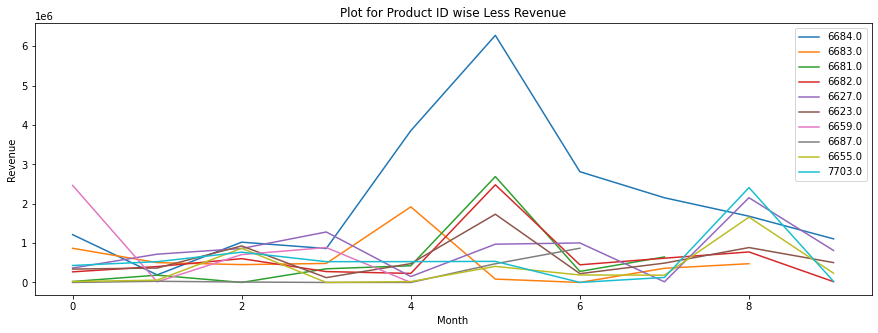

In [57]:
plt.figure(figsize=(15,5))
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[0]]['Month Number'])['Total Revenue Amount $'].sum().values,label=less_profit[0])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[1]]['Month Number'])['Total Revenue Amount $'].sum().values,label=less_profit[1])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[2]]['Month Number'])['Total Revenue Amount $'].sum().values,label=less_profit[2])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[3]]['Month Number'])['Total Revenue Amount $'].sum().values,label=less_profit[3])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[4]]['Month Number'])['Total Revenue Amount $'].sum().values,label=less_profit[4])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[5]]['Month Number'])['Total Revenue Amount $'].sum().values,label=less_profit[5])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[6]]['Month Number'])['Total Revenue Amount $'].sum().values,label=less_profit[6])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[7]]['Month Number'])['Total Revenue Amount $'].sum().values,label=less_profit[7])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[8]]['Month Number'])['Total Revenue Amount $'].sum().values,label=less_profit[8])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[9]]['Month Number'])['Total Revenue Amount $'].sum().values,label=less_profit[9])
plt.legend(loc='upper right')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title(f"Plot for Product ID wise Less Revenue")

In [58]:
# for i in less_profit:
#     temp = df1[df1['Product ID'] == i]
#     plt.figure()
#     plt.figure(figsize=(15,5))
#     sns.lineplot(x='Month Number',y='Total Revenue Amount $',data=temp)
#     plt.xlabel("Month")
#     plt.ylabel("Revenue")
#     plt.title(f"Plot for Product ID {int(i)}")

Text(0.5, 1.0, 'Plot for Product ID wise Less Cost')

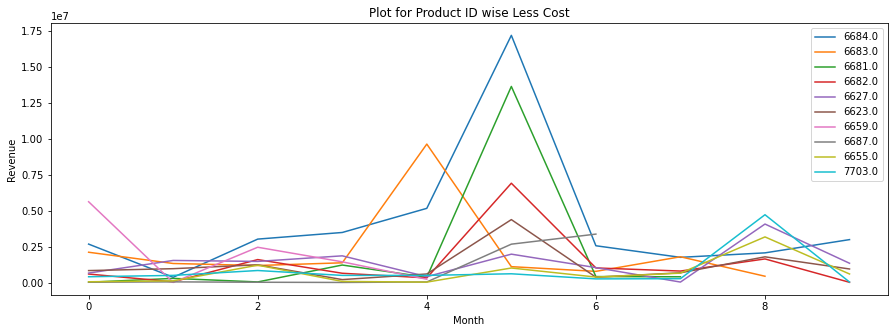

In [59]:
plt.figure(figsize=(15,5))
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[0]]['Month Number'])['Total Cost Amount $'].sum().values,label=less_profit[0])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[1]]['Month Number'])['Total Cost Amount $'].sum().values,label=less_profit[1])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[2]]['Month Number'])['Total Cost Amount $'].sum().values,label=less_profit[2])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[3]]['Month Number'])['Total Cost Amount $'].sum().values,label=less_profit[3])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[4]]['Month Number'])['Total Cost Amount $'].sum().values,label=less_profit[4])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[5]]['Month Number'])['Total Cost Amount $'].sum().values,label=less_profit[5])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[6]]['Month Number'])['Total Cost Amount $'].sum().values,label=less_profit[6])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[7]]['Month Number'])['Total Cost Amount $'].sum().values,label=less_profit[7])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[8]]['Month Number'])['Total Cost Amount $'].sum().values,label=less_profit[8])
plt.plot(df1.groupby(df1[df1['Product ID'] == less_profit[9]]['Month Number'])['Total Cost Amount $'].sum().values,label=less_profit[9])
plt.legend(loc='upper right')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title(f"Plot for Product ID wise Less Cost")

In [60]:
# for i in less_profit:
#     temp = df1[df1['Product ID'] == i]
#     plt.figure()
#     plt.figure(figsize=(15,5))
#     sns.lineplot(x='Month Number',y='Total Cost Amount $',data=temp)
#     plt.xlabel("Month")
#     plt.ylabel("Cost")
#     plt.title(f"Plot for {int(i)}")

In [61]:
cus = pd.DataFrame(df1.groupby(['Customer ID'])['profit'].sum())
cus.reset_index(inplace=True)

most_profit = list(cus.sort_values('profit',ascending=False)['Customer ID'][0:10])

Text(0.5, 1.0, 'Plot for Customer ID wise Most Revenue')

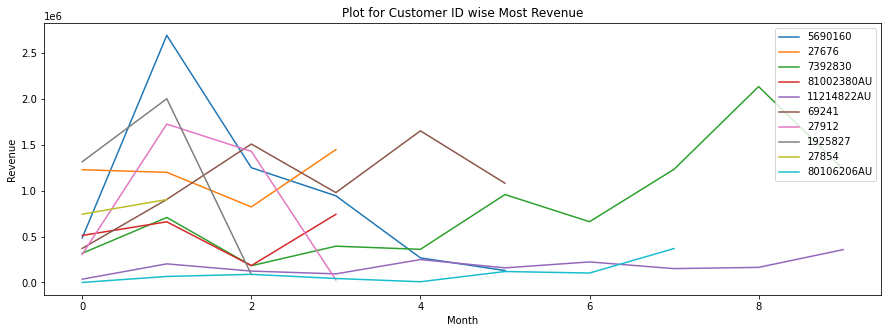

In [62]:
plt.figure(figsize=(15,5))
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[0]]['Month Number'])['Total Revenue Amount $'].sum().values,label=most_profit[0])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[1]]['Month Number'])['Total Revenue Amount $'].sum().values,label=most_profit[1])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[2]]['Month Number'])['Total Revenue Amount $'].sum().values,label=most_profit[2])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[3]]['Month Number'])['Total Revenue Amount $'].sum().values,label=most_profit[3])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[4]]['Month Number'])['Total Revenue Amount $'].sum().values,label=most_profit[4])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[5]]['Month Number'])['Total Revenue Amount $'].sum().values,label=most_profit[5])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[6]]['Month Number'])['Total Revenue Amount $'].sum().values,label=most_profit[6])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[7]]['Month Number'])['Total Revenue Amount $'].sum().values,label=most_profit[7])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[8]]['Month Number'])['Total Revenue Amount $'].sum().values,label=most_profit[8])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[9]]['Month Number'])['Total Revenue Amount $'].sum().values,label=most_profit[9])
plt.legend(loc='upper right')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title(f"Plot for Customer ID wise Most Revenue")

In [63]:
# for i in most_profit:
#     temp = df1[df1['Customer ID'] == i]
#     plt.figure()
#     plt.figure(figsize=(15,5))
#     sns.lineplot(x='Month Number',y='Total Revenue Amount $',data=temp)
#     plt.xlabel("Month")
#     plt.ylabel("Revenue")
#     plt.title(f"Plot for Customer ID {i}")

Text(0.5, 1.0, 'Plot for Customer ID wise Most Cost')

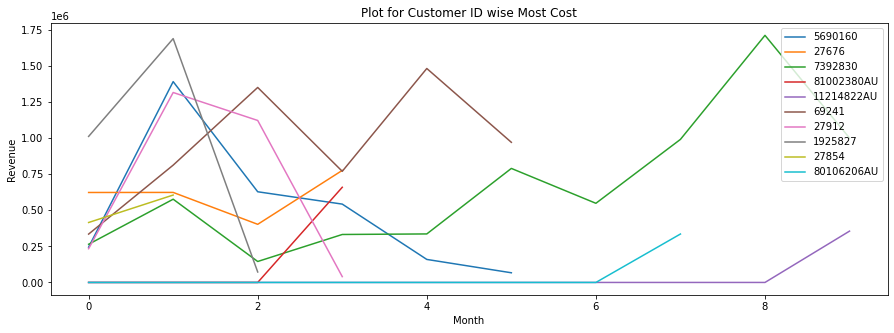

In [65]:
plt.figure(figsize=(15,5))
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[0]]['Month Number'])['Total Cost Amount $'].sum().values,label=most_profit[0])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[1]]['Month Number'])['Total Cost Amount $'].sum().values,label=most_profit[1])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[2]]['Month Number'])['Total Cost Amount $'].sum().values,label=most_profit[2])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[3]]['Month Number'])['Total Cost Amount $'].sum().values,label=most_profit[3])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[4]]['Month Number'])['Total Cost Amount $'].sum().values,label=most_profit[4])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[5]]['Month Number'])['Total Cost Amount $'].sum().values,label=most_profit[5])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[6]]['Month Number'])['Total Cost Amount $'].sum().values,label=most_profit[6])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[7]]['Month Number'])['Total Cost Amount $'].sum().values,label=most_profit[7])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[8]]['Month Number'])['Total Cost Amount $'].sum().values,label=most_profit[8])
plt.plot(df1.groupby(df1[df1['Customer ID'] == most_profit[9]]['Month Number'])['Total Cost Amount $'].sum().values,label=most_profit[9])
plt.legend(loc='upper right')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title(f"Plot for Customer ID wise Most Cost")

In [64]:
# for i in most_profit:
#     temp = df1[df1['Customer ID'] == i]
#     plt.figure()
#     plt.figure(figsize=(15,5))
#     sns.lineplot(x='Month Number',y='Total Cost Amount $',data=temp)
#     plt.xlabel("Month")
#     plt.ylabel("Cost")
#     plt.title(f"Plot for Customer ID {i}")

# Task 2

In [57]:
cus_info = pd.read_csv("Customer Data.csv")
con_regn = pd.read_csv("Geography data.csv")
invo_data = pd.read_csv("Invoice data.csv")

In [58]:
cus_info.head()

,Customer ID,Industry,Customer Account Type,Customer Tiering,Customer Employees
0,9303700,Retail,End Customer,Commercial,75
1,9057294,Hospitality,End Customer,Commercial,30
2,9274007,Hospitality,End Customer,Commercial,2
3,9546884,Retail,End Customer,Commercial,5500
4,8139793,Hospitality,End Customer,Commercial,8


In [59]:
con_regn.head()

,Country Name,Region
0,turkey,europe
1,belgium,europe
2,norway,europe
3,netherlands,europe
4,china (prc),asia pacific and japan


In [60]:
invo_data.head()

,Transaction ID,Customer ID,Invoice Date,Payment Date,Invoice Amount,Country,Payment Term
0,2829652582,158957,28/02/2020,2020-05-07,191.32,UNITED STATES,33
1,2829747115,27389,17/03/2020,Null,96.27,UNITED STATES,45
2,2830116610,8481553,27/05/2020,2020-07-06,54.27,UNITED STATES,35
3,2829948029,28060,20/04/2020,2020-08-11,69.27,UNITED STATES,45
4,2829614796,158819,17/02/2020,2020-04-23,36.08,UNITED STATES,44


In [61]:
invo_data.columns

Index(['Transaction ID', 'Customer ID', 'Invoice Date', 'Payment Date',
       'Invoice Amount', 'Country ', 'Payment Term'],
      dtype='object')

In [62]:
invo_data.rename(columns = {'Country ': 'Country'},inplace=True)

In [64]:
invo_data['Country'].unique()

array(['UNITED STATES', 'CANADA', 'IRELAND', 'PORTUGAL', 'TURKEY',
       'ITALY', 'COLOMBIA', 'ARGENTINA', 'INDIA', 'THAILAND', 'MALAYSIA',
       'AUSTRALIA', 'FRANCE', 'SPAIN', 'GERMANY', 'MEXICO', 'CHILE',
       'JAPAN', 'NETHERLANDS', 'UNITED KINGDOM', 'INDONESIA',
       'NEW ZEALAND', 'DENMARK', 'SWITZERLAND', 'PUERTO RICO',
       'CHINA (PRC)', 'POLAND', 'KOREA (REPUBLIC OF)', 'HONG KONG',
       'NORWAY', 'BRUNEI DARUSSALAM', 'PHILIPPINES', 'SINGAPORE',
       'BELGIUM', 'SWEDEN', 'AUSTRIA', 'DOMINICAN REPUBLIC', 'MACAU',
       'PERU'], dtype=object)

In [65]:
invo_data['Country'] = invo_data['Country'].str.lower()

In [66]:
con_regn.rename(columns = {'Country Name': 'Country'},inplace=True)

In [67]:
df1 = invo_data.merge(con_regn,how='left',on=['Country'])

In [68]:
df1.head()

,Transaction ID,Customer ID,Invoice Date,Payment Date,Invoice Amount,Country,Payment Term,Region
0,2829652582,158957,28/02/2020,2020-05-07,191.32,united states,33,americas
1,2829747115,27389,17/03/2020,Null,96.27,united states,45,americas
2,2830116610,8481553,27/05/2020,2020-07-06,54.27,united states,35,americas
3,2829948029,28060,20/04/2020,2020-08-11,69.27,united states,45,americas
4,2829614796,158819,17/02/2020,2020-04-23,36.08,united states,44,americas


In [69]:
# 1.	How much cash was collected in each region in this data?

In [106]:
region = pd.DataFrame(df1.groupby('Region')['Invoice Amount'].sum())

region.reset_index(inplace=True)

region

,Region,Invoice Amount
0,americas,9.522620e+08
1,asia pacific and japan,2.438150e+07
2,europe,1.112728e+08


In [114]:
for i in range(region.shape[0]):
    print(region['Region'][i],"---",region['Invoice Amount'][i],"$")

americas --- 952262019.5641382 $
asia pacific and japan --- 24381496.305400033 $
europe --- 111272754.60659978 $


In [71]:
region[region['Invoice Amount'] == region['Invoice Amount'].min()] #insides

,Region,Invoice Amount
1,asia pacific and japan,2.438150e+07


In [74]:
# 2.	What proportion of transactions were:
# a.	Paid later than the payment term
# b.	Not paid at all
# 3.	Identify:

In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322907 entries, 0 to 322906
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  322907 non-null  object 
 1   Customer ID     322907 non-null  object 
 2   Invoice Date    322907 non-null  object 
 3   Payment Date    322907 non-null  object 
 4   Invoice Amount  322907 non-null  float64
 5   Country         322907 non-null  object 
 6   Payment Term    322907 non-null  int64  
 7   Region          322907 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 14.8+ MB


In [75]:
df1 = df1.replace('Null',0)

In [76]:
df1.isna().sum()

Transaction ID    0
Customer ID       0
Invoice Date      0
Payment Date      0
Invoice Amount    0
Country           0
Payment Term      0
Region            0
dtype: int64

In [77]:
df1['Invoice Date'] = pd.to_datetime(df1['Invoice Date'])

In [78]:
df1['Payment Date'] = pd.to_datetime(df1['Payment Date'])

In [79]:
df1['Duration'] = df1['Payment Date'] - df1['Invoice Date']

In [80]:
df1['Payment Status'] = 0

In [81]:
df1.Duration = (df1.Duration / np.timedelta64(1,'D')).astype(int)

In [82]:
df1.loc[df1['Duration'] > df1['Payment Term'], 'Payment Status'] = 'Paid Later'

In [83]:
df1.loc[df1['Payment Date']==pd.to_datetime('1970-01-01'), 'Payment Status'] = 'Not Paid'

In [84]:
df1.loc[df1['Payment Status'] == 0, 'Payment Status'] = 'Paid Early'

In [85]:
print("Paid Later",df1[df1['Payment Status']=="Paid Later"].shape[0]/df1.shape[0])

Paid Later 0.46537857649416087


In [86]:
print("Not Paid",df1[df1['Payment Status']=="Not Paid"].shape[0]/df1.shape[0])

Not Paid 0.09548260025332371


In [87]:
print("Paid",df1[df1['Payment Status']=="Paid Early"].shape[0]/df1.shape[0])

Paid 0.4391388232525154


In [88]:
# 3.	Identify:
# a.	Customer IDs of the customers who contributed the most to the cashflow
# b.	Which country had the most cashflow. Was this consistent throughout each month in the data? 
# c.	Which industry contributes to the most cashflow


In [89]:
df1.columns

Index(['Transaction ID', 'Customer ID', 'Invoice Date', 'Payment Date',
       'Invoice Amount', 'Country', 'Payment Term', 'Region', 'Duration',
       'Payment Status'],
      dtype='object')

In [90]:
# a.	Customer IDs of the customers who contributed the most to the cashflow
cus_id = pd.DataFrame(df1.groupby('Customer ID')['Invoice Amount'].sum())
cus_id.reset_index(inplace=True)

cus_id[cus_id['Invoice Amount'] == cus_id['Invoice Amount'].max()]

,Customer ID,Invoice Amount
584,27374,35427496.61


In [123]:
cus_id[cus_id['Invoice Amount'] == cus_id['Invoice Amount'].min()]

,Customer ID,Invoice Amount
11312,9754010,6.27


In [122]:
cus_id['Invoice Amount'].describe()

count    1.363400e+04
mean     7.979436e+04
std      7.142131e+05
min      6.270000e+00
25%      7.269475e+02
50%      1.605530e+03
75%      5.351865e+03
max      3.542750e+07
Name: Invoice Amount, dtype: float64

In [91]:
temp = df1.copy()

In [92]:
temp['Month'] = pd.to_datetime(temp['Invoice Date']).dt.month

In [93]:
temp.groupby(['Country','Month'])['Invoice Amount'].sum()

Country        Month
argentina      1        2.016947e+06
               2        3.912443e+05
               3        3.296532e+05
               4        4.989652e+05
               5        5.277423e+05
                            ...     
united states  8        6.623545e+07
               9        4.459192e+07
               10       5.253660e+07
               11       5.223012e+07
               12       1.894714e+07
Name: Invoice Amount, Length: 306, dtype: float64

In [94]:
contry_df = pd.DataFrame(temp.groupby(['Country','Month'])['Invoice Amount'].sum())

In [95]:
contry_df.reset_index(inplace=True)

In [96]:
# b.	Which country had the most cashflow. Was this consistent throughout each month in the data?
contry_df[contry_df['Country']=='united states']

,Country,Month,Invoice Amount
294,united states,1,9.643237e+07
295,united states,2,1.177913e+08
296,united states,3,1.141723e+08
297,united states,4,1.042457e+08
298,united states,5,9.749174e+07
299,united states,6,1.396966e+08
300,united states,7,1.062987e+07
301,united states,8,6.623545e+07
302,united states,9,4.459192e+07
303,united states,10,5.253660e+07


In [97]:
df1.columns

Index(['Transaction ID', 'Customer ID', 'Invoice Date', 'Payment Date',
       'Invoice Amount', 'Country', 'Payment Term', 'Region', 'Duration',
       'Payment Status'],
      dtype='object')

In [98]:
cus_info.columns

Index(['Customer ID', 'Industry', 'Customer Account Type', 'Customer Tiering',
       'Customer Employees'],
      dtype='object')

In [99]:
df2 = df1.merge(cus_info,how='left',on=['Customer ID'])

In [100]:
# c.	Which industry contributes to the most cashflow
ind_id = pd.DataFrame(df2.groupby('Industry')['Invoice Amount'].sum())
ind_id.reset_index(inplace=True)

ind_id[ind_id['Invoice Amount'] == ind_id['Invoice Amount'].max()]

,Industry,Invoice Amount
0,Banking,6.654722e+08


In [119]:
ind_id[ind_id['Invoice Amount'] == ind_id['Invoice Amount'].min()]

,Industry,Invoice Amount
1,Hospitality,1.317643e+08


In [101]:
df2.head()

,Transaction ID,Customer ID,Invoice Date,Payment Date,Invoice Amount,Country,Payment Term,Region,Duration,Payment Status,Industry,Customer Account Type,Customer Tiering,Customer Employees
0,2829652582,158957,2020-02-28,2020-05-07,191.32,united states,33,americas,69,Paid Later,Banking,End Customer,Nationals,14772
1,2829747115,27389,2020-03-17,1970-01-01,96.27,united states,45,americas,-18338,Not Paid,Retail,Partner,Commercial,67
2,2830116610,8481553,2020-05-27,2020-07-06,54.27,united states,35,americas,40,Paid Later,Retail,End Customer,Commercial,2992
3,2829948029,28060,2020-04-20,2020-08-11,69.27,united states,45,americas,113,Paid Later,Banking,End Customer,Nationals,22899
4,2829614796,158819,2020-02-17,2020-04-23,36.08,united states,44,americas,66,Paid Later,Banking,End Customer,Nationals,14243


In [102]:
# 4.	Is there a relationship between the total amount a customer spends and how many employees it has?
df2.sort_values('Invoice Amount',ascending=False)

,Transaction ID,Customer ID,Invoice Date,Payment Date,Invoice Amount,Country,Payment Term,Region,Duration,Payment Status,Industry,Customer Account Type,Customer Tiering,Customer Employees
263279,6200030002,9915819,2020-02-20,2020-03-30,5.282581e+06,united states,30,americas,39,Paid Later,Banking,End Customer,Commercial,856
218335,6007094314,5386184,2020-03-31,2020-09-25,4.490282e+06,united states,60,americas,178,Paid Later,Retail,End Customer,Nationals,3
41725,6007089084,27374,2020-03-26,2020-03-28,4.329350e+06,united states,30,americas,2,Paid Early,Banking,End Customer,Nationals,36484
239828,100463595,9461493,2020-01-17,2020-09-25,4.256952e+06,united states,30,americas,252,Paid Later,Hospitality,End Customer,Nationals,1753
67009,380426,003070ES,2020-02-28,2020-06-30,4.095971e+06,spain,60,europe,123,Paid Later,Banking,End Customer,Nationals,15558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241834,379851,003070ES,2020-11-02,2020-03-02,1.090000e-02,spain,60,europe,-245,Paid Early,Banking,End Customer,Nationals,15558
114819,379847,003070ES,2020-11-02,2020-03-02,1.090000e-02,spain,60,europe,-245,Paid Early,Banking,End Customer,Nationals,15558
166387,100475817,7392843,2020-05-16,2020-06-12,1.000000e-02,united states,30,americas,27,Paid Early,Hospitality,End Customer,Commercial,500
130531,2139171,81002672AU,2020-06-24,1970-01-01,7.000000e-03,australia,30,asia pacific and japan,-18437,Not Paid,Retail,End Customer,Commercial,0


<AxesSubplot:xlabel='Month', ylabel='Invoice Amount'>

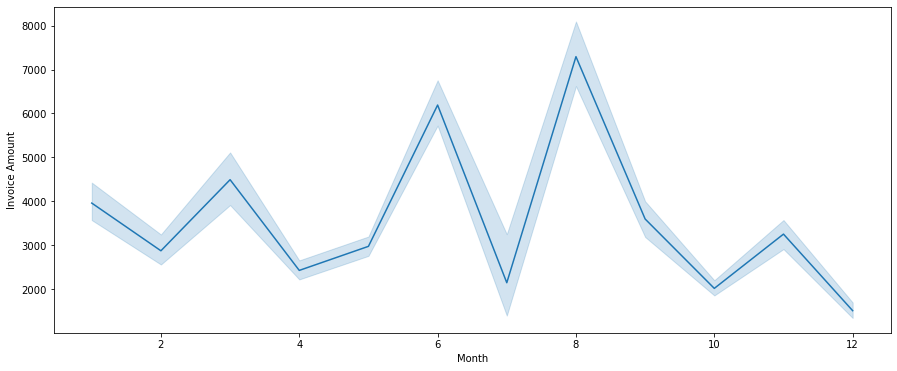

In [104]:
# 5.	Is there a trend in the amount of cash NCR collects?
plt.figure(figsize=(15,6))
sns.lineplot(x='Month',y='Invoice Amount',data=temp)#on 6 and 8 th month we have more sales.

end